### Submission by:
Sam Himes, Nidhi Soley

#### In this notebook, we performed the autoencoder on the four different dataset variation we had: binary, three class classification, multi over sampled and under sampled dataset.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from  tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import shutil
import time
#import torch
#import cv2 as cv2
#from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
#from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.models import model_from_json
from tensorflow.keras.layers import BatchNormalization

/var/folders/mc/0r4fnmbs0qsgm7y2v010w5sh0000gn/T/ipykernel_15792/3209225767.py:28: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
groundTruth = pd.read_csv('../archive/GroundTruth.csv')

In [3]:
#TRY OVER SAMPLING OTHER LABELS AND UNDER SAMPLING THE NV

#First, add a new column to make over/undersampling easier

def defineLabel(row):
    if row['MEL'] == 1:
        val = "MEL"
    elif row['NV'] ==1:
        val = 'NV'
    elif row['BCC'] ==1:
        val = 'BCC'
    elif row['AKIEC'] ==1:
        val = 'AKIEC'
    elif row['BKL'] ==1:
        val = 'BKL'
    elif row['DF'] ==1:
        val = 'DF'
    else:
        val = 'VASC'
    return val

groundTruth['label'] = groundTruth.apply(defineLabel, axis=1)


### Binary


In [4]:
binaryTrainData=pd.read_csv('binaryTrainData.csv')
binaryTestData=pd.read_csv('binaryTestData.csv')
binaryValData=pd.read_csv('binaryValData.csv')

In [5]:
#PROCESS BINARY IMAGES TRAIN
binary_images_train = []

for i in binaryTrainData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    binary_images_train.append(input_arr)
    

In [6]:
#PROCESS BINARY IMAGES TRAIN
binary_images_test = []

for i in binaryTestData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    binary_images_test.append(input_arr)

In [7]:
#PROCESS BINARY IMAGES TRAIN
binary_images_val = []

for i in binaryValData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    binary_images_val.append(input_arr)

In [8]:
#FINAL BINARY PROCESSING

#Train
binary_yTrain = np.asarray(binaryTrainData.loc[:, binaryTrainData.columns != 'image'])
print(binary_yTrain.shape)

#Test
binary_yTest = np.asarray(binaryTestData.loc[:, binaryTestData.columns != 'image'])
print(binary_yTest.shape)

#Val
binary_yVal = np.asarray(binaryValData.loc[:, binaryValData.columns != 'image'])
print(binary_yVal.shape)

#Train
binary_xTrain = np.asarray(binary_images_train).astype('float32') / 255.
print(binary_xTrain.shape)

#Test
binary_xTest = np.asarray(binary_images_test).astype('float32') / 255.
print(binary_xTest.shape)

#Val
binary_xVal = np.asarray(binary_images_val).astype('float32') / 255.
print(binary_xVal.shape) 

(700, 1)
(150, 1)
(150, 1)
(700, 450, 600, 3)
(150, 450, 600, 3)
(150, 450, 600, 3)


### Binary data: Autoencoder using Conv2D
Built conv2d model with batch normalization and max pool layer

In [10]:
input_img = Input(shape=(450, 600, 3))  
#encoder
x = Conv2D(32, (5, 5), activation='selu', padding='same', name='conv1')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same', name='max1')(x)
x = Conv2D(32, (3, 3), activation='selu', padding='same', name='conv2')(x)
encoded = BatchNormalization()(x)

#encoded = MaxPooling2D((2, 2), padding='same', name='max3')(x)


2022-04-26 10:03:51.448969: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#decoder
x = Conv2D(32, (3, 3), activation='selu', padding='same', name='conv5')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2), name='up2')(x)
x = Conv2D(3, (5, 5), activation='sigmoid', padding='same', name='conv6')(x)
decoded = BatchNormalization()(x)
autoencoder = Model(input_img, decoded)

In [19]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450, 600, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 450, 600, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 450, 600, 32)     128       
 ormalization)                                                   
                                                                 
 max1 (MaxPooling2D)         (None, 225, 300, 32)      0         
                                                                 
 conv2 (Conv2D)              (None, 225, 300, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 225, 300, 32)     128       
 hNormalization)                                           

In [20]:
history1=autoencoder.fit(binary_xTrain[1:50,:,:,:], binary_xTrain[1:50,:,:,:],
                epochs=15,
                batch_size=50,
                shuffle=True,
                validation_data=(binary_xTest[1:50,:,:,:], binary_xTest[1:50,:,:,:]))

Epoch 1/15
1/1 [==============================] - 85s 85s/step - loss: 6.7722 - val_loss: 0.7297
Epoch 2/15
1/1 [==============================] - 59s 59s/step - loss: 5.7414 - val_loss: 0.7093
Epoch 3/15
1/1 [==============================] - 70s 70s/step - loss: 5.2863 - val_loss: 0.6977
Epoch 4/15
1/1 [==============================] - 78s 78s/step - loss: 4.9995 - val_loss: 0.6839
Epoch 5/15
1/1 [==============================] - 85s 85s/step - loss: 4.3911 - val_loss: 0.6718
Epoch 6/15
1/1 [==============================] - 85s 85s/step - loss: 4.0587 - val_loss: 0.6645
Epoch 7/15
1/1 [==============================] - 81s 81s/step - loss: 3.5897 - val_loss: 0.6601
Epoch 8/15
1/1 [==============================] - 69s 69s/step - loss: 3.1782 - val_loss: 0.6607
Epoch 9/15
1/1 [==============================] - 76s 76s/step - loss: 3.1226 - val_loss: 0.6629
Epoch 10/15
1/1 [==============================] - 77s 77s/step - loss: 3.0970 - val_loss: 0.6622
Epoch 11/15
1/1 [============

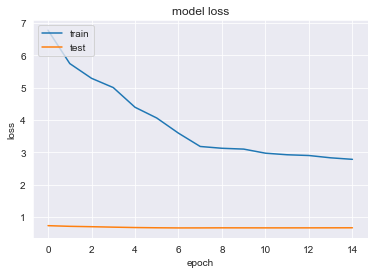

In [22]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The train loss decreases with each epoch however, the validation loss decreases till 6-7 epochs and then becomes steady.The smaller the loss, the better a job the classifier is at modeling the relationship between the input data and the output targets.
That said, there is a point where we can overfit our model — by modeling the training data too closely, our model loses the ability to generalize. In our case the training loss is decreasing however, the validation loss does not decrease after a point which means the model is overfit. 

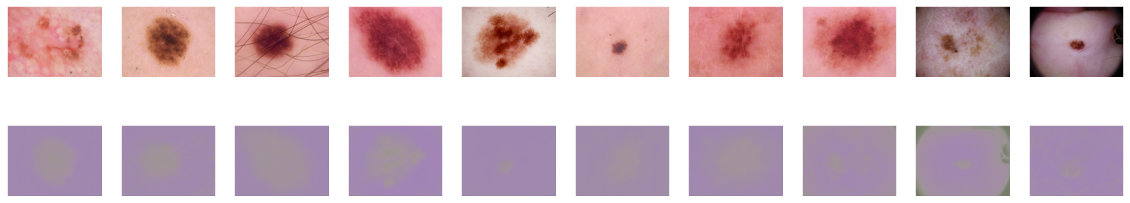

In [25]:
decoded_imgs = autoencoder.predict(binary_xTest[1:50,:,:,:])
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(binary_xTest[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(450, 600, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The output images are not nicely reconstructed however, the cancer or darker pigmentation is separated from the rest of the skin.

### K means cluster analysis 

In [31]:
kmeans=KMeans(n_clusters=2)
kmeans.fit_predict(binary_xTrain.reshape(len(binary_xTrain),-1))


array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

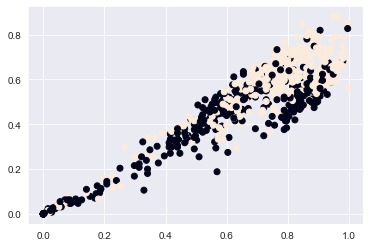

In [32]:
plt.scatter(binary_xTrain.reshape(len(binary_xTrain),-1)[:,0],binary_xTrain.reshape(len(binary_xTrain),-1)[:,1],c=kmeans.labels_)

### Observation.
The loss of the Autoencoder CONV2D shows that the loss is decreasing with each epoch for training but remains same for validation hence the model might be overfitting. However, since our data set is too big we were not able to run the model on entire dataset. This probably leads to classifying everything to just one class. Moreover the images in the dataset are very close to each other and hence all the reconstructed images just have a segmentation between mole and skin.
The cluster graph shows there are only 2 classes, and 1 which is black dots represents NV type of skin cancer, white dots represent all other classes or non NV classes.

### Three class classification

In [4]:
tripleTrainData=pd.read_csv('tripleTrainData.csv')
tripleTestData=pd.read_csv('tripleTestData.csv')
tripleValData=pd.read_csv('tripleValData.csv')

In [5]:
#PROCESS TRIPLE IMAGES TRAIN
triple_images_train = []

for i in tripleTrainData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    triple_images_train.append(input_arr)

In [6]:
#PROCESS TRIPLE IMAGES TEST
triple_images_test = []

for i in tripleTestData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    triple_images_test.append(input_arr)

In [7]:
#PROCESS TRIPLE IMAGES VAL
triple_images_val = []

for i in tripleValData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    triple_images_val.append(input_arr)

In [9]:
#FINAL BINARY PROCESSING

#Train
triple_yTrain = np.asarray(tripleTrainData.loc[:, tripleTrainData.columns != 'image'])
print(triple_yTrain.shape)

#Test
triple_yTest = np.asarray(tripleTestData.loc[:, tripleTestData.columns != 'image'])
print(triple_yTest.shape)

#Val
triple_yVal = np.asarray(tripleValData.loc[:, tripleValData.columns != 'image'])
print(triple_yVal.shape)

#Train
triple_xTrain = np.asarray(triple_images_train).astype('float32') / 255.
print(triple_xTrain.shape)

#Test
triple_xTest = np.asarray(triple_images_test).astype('float32') / 255.
print(triple_xTest.shape)

#Val
triple_xVal = np.asarray(triple_images_val).astype('float32') / 255.
print(triple_xVal.shape) 

(700, 3)
(150, 3)
(150, 3)
(700, 450, 600, 3)
(150, 450, 600, 3)
(150, 450, 600, 3)


### Autoencoder using Conv2D

In [11]:
input_img = Input(shape=(450, 600, 3))  

#encoder
x = Conv2D(32, (5, 5), activation='relu', padding='same', name='conv1')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same', name='max1')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2')(x)
encoded = BatchNormalization()(x)

2022-04-26 10:50:19.642214: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv5')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2), name='up2')(x)
x = Conv2D(3, (5, 5), activation='sigmoid', padding='same', name='conv6')(x)
decoded = BatchNormalization()(x)
autoencoder = Model(input_img, decoded)

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450, 600, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 450, 600, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 450, 600, 32)     128       
 ormalization)                                                   
                                                                 
 max1 (MaxPooling2D)         (None, 225, 300, 32)      0         
                                                                 
 conv2 (Conv2D)              (None, 225, 300, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 225, 300, 32)     128       
 hNormalization)                                             

In [14]:
history2=autoencoder.fit(triple_xTrain[1:50,:,:,:], triple_xTrain[1:50,:,:,:],
                epochs=15,
                batch_size=64,
                shuffle=True,
                validation_data=(triple_xTest[1:50,:,:,:], triple_xTest[1:50,:,:,:]))

Epoch 1/15
1/1 [==============================] - 71s 71s/step - loss: 6.4003 - val_loss: 0.6895
Epoch 2/15
1/1 [==============================] - 62s 62s/step - loss: 5.2361 - val_loss: 0.6881
Epoch 3/15
1/1 [==============================] - 61s 61s/step - loss: 4.5652 - val_loss: 0.6841
Epoch 4/15
1/1 [==============================] - 60s 60s/step - loss: 4.0562 - val_loss: 0.6848
Epoch 5/15
1/1 [==============================] - 54s 54s/step - loss: 3.5201 - val_loss: 0.6877
Epoch 6/15
1/1 [==============================] - 81s 81s/step - loss: 3.2346 - val_loss: 0.6895
Epoch 7/15
1/1 [==============================] - 70s 70s/step - loss: 3.1352 - val_loss: 0.6895
Epoch 8/15
1/1 [==============================] - 62s 62s/step - loss: 3.0056 - val_loss: 0.6873
Epoch 9/15
1/1 [==============================] - 68s 68s/step - loss: 3.0409 - val_loss: 0.6841
Epoch 10/15
1/1 [==============================] - 68s 68s/step - loss: 2.9918 - val_loss: 0.6829
Epoch 11/15
1/1 [============

In [17]:
decoded_imgs = autoencoder.predict(triple_xTest[1:50,:,:,:])


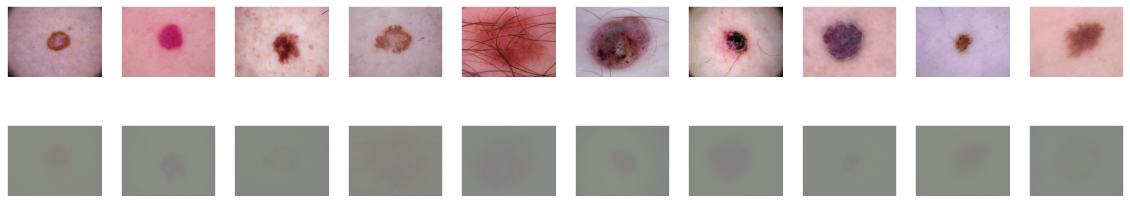

In [19]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(triple_xTest[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(450, 600, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The results are same as with the binary data set, we are still not able to reconstruct the entire image.

### Sparsed Autoencoder for Three Class and Kmeans cluster Analysis

In [21]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)

tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[450, 600, 3]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(450*600*3, activation="sigmoid"),
    keras.layers.Reshape([450, 600, 3])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer="adam",
                     metrics=['accuracy'])
history2 = sparse_l1_ae.fit(triple_xTrain[1:50,:,:,:], triple_xTrain[1:50,:,:,:], epochs=15,verbose=True,validation_data=(triple_xTest[1:50,:,:,:],triple_xTest[1:50,:,:,:]))


Epoch 1/15
2/2 [==============================] - 26s 15s/step - loss: 13.7746 - accuracy: 0.3236 - val_loss: 29.2819 - val_accuracy: 0.4706
Epoch 2/15
2/2 [==============================] - 18s 10s/step - loss: 24.9137 - accuracy: 0.5237 - val_loss: 12.4822 - val_accuracy: 0.7074
Epoch 3/15
2/2 [==============================] - 32s 19s/step - loss: 10.5890 - accuracy: 0.7289 - val_loss: 4.2859 - val_accuracy: 0.8725
Epoch 4/15
2/2 [==============================] - 25s 13s/step - loss: 3.2597 - accuracy: 0.7352 - val_loss: 0.9865 - val_accuracy: 0.3499
Epoch 5/15
2/2 [==============================] - 25s 11s/step - loss: 0.9837 - accuracy: 0.3680 - val_loss: 0.9593 - val_accuracy: 0.6390
Epoch 6/15
2/2 [==============================] - 18s 10s/step - loss: 0.9523 - accuracy: 0.6921 - val_loss: 0.9132 - val_accuracy: 0.8419
Epoch 7/15
2/2 [==============================] - 32s 19s/step - loss: 0.9447 - accuracy: 0.8446 - val_loss: 0.8734 - val_accuracy: 0.8354
Epoch 8/15
2/2 [======

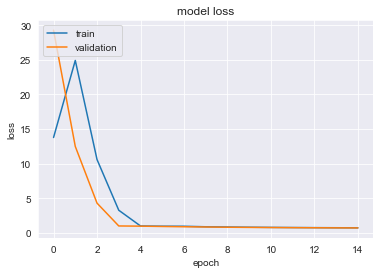

In [23]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


The loss for both the training and validation set decreases with epoch, and also converge after 5 epochs. This means the model did a good job in classification.

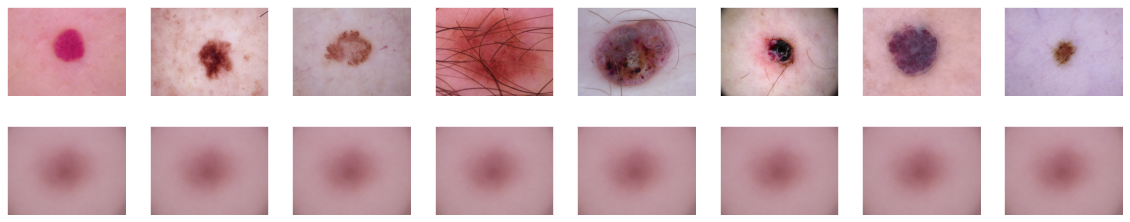

In [25]:
decoded_imgs = sparse_l1_ae.predict(triple_xTest[1:50,:,:,:])
n = 8
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(triple_xTest[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

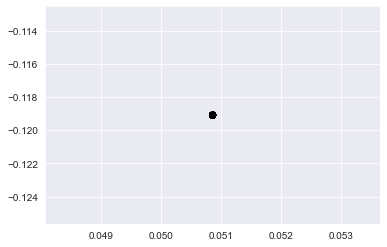

In [28]:
from sklearn.cluster import KMeans
import seaborn as sns
codings1=sparse_l1_encoder.predict(triple_xTrain[1:50,:,:,:])
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans()
    kmeans.fit_predict(codings1)
    score_1.append(kmeans.inertia_)
plt.scatter(codings1[:,0],codings1[:,1],c=kmeans.labels_)

Cluster analysis using the encoder predicts all the classes as in black dot which is NV class.Hence all the output images are more or less similar to each other

In [29]:
kmeans=KMeans(n_clusters=3)
kmeans.fit_predict(triple_xTrain.reshape(len(triple_xTrain),-1))


array([1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2,
       1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1,
       2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2,
       1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 0,

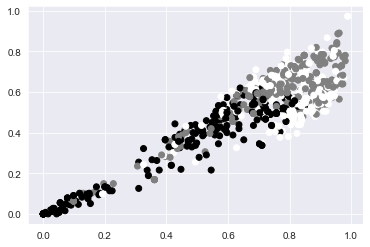

In [30]:
plt.scatter(triple_xTrain.reshape(len(triple_xTrain),-1)[:,0],triple_xTrain.reshape(len(triple_xTrain),-1)[:,1],c=kmeans.labels_)


The cluster plot clearly shows three classes,black, white, gray.

#### Observation.
The accuracy of the Sparsed Autoencoder on the validation set for triple class is 0.93, and the learning curve (loss curve)also shows that the loss is decreasing with each epoch. Hence we think that the sparsed autoencoder is a good model, however, since our data set is too big we were not able to run the model on entire dataset. This probably leads to classifying everything to just one class. Moreover the images in the dataset are very close to each other and hence all the reconstructed images look similar.
The cluster Kmeans analysis shows that the encoded model predicts every class as majorly just one class-NV.

## Oversample multi class classification.

In [33]:
multi_overTrainData=pd.read_csv('multi_overTrainData.csv')
multi_overTestData=pd.read_csv('multi_overTestData.csv')
multi_overValData=pd.read_csv('multi_overValData.csv')

In [34]:
#PROCESS TRIPLE IMAGES TRAIN
over_images_train = []

for i in multi_overTrainData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    over_images_train.append(input_arr)

In [35]:
#PROCESS TRIPLE IMAGES TRAIN
over_images_test = []

for i in multi_overTestData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    over_images_test.append(input_arr)

In [36]:
#PROCESS TRIPLE IMAGES TRAIN
over_images_val = []

for i in multi_overValData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    over_images_val.append(input_arr)

In [37]:
#FINAL Over sample whole data set PROCESSING

#Train
over_yTrain = np.asarray(multi_overTrainData.loc[:, multi_overTrainData.columns != 'image'])
print(over_yTrain.shape)

#Test
over_yTest = np.asarray(multi_overTestData.loc[:, multi_overTestData.columns != 'image'])
print(over_yTest.shape)

#Val
over_yVal = np.asarray(multi_overValData.loc[:, multi_overValData.columns != 'image'])
print(over_yVal.shape)

#Train
over_xTrain = np.asarray(over_images_train).astype('float32') / 255.
print(over_xTrain.shape)

#Test
over_xTest = np.asarray(over_images_test).astype('float32') / 255.
print(over_xTest.shape)

#Val
over_xVal = np.asarray(over_images_val).astype('float32') / 255.
print(over_xVal.shape) 

(700, 7)
(300, 7)
(150, 7)
(700, 450, 600, 3)
(300, 450, 600, 3)
(150, 450, 600, 3)


### Sparsed Autoencoder and Kmeans Clustering analysis

In [9]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[450, 600, 3]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(400, activation="selu"),
    
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[400]),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(400, activation="selu"),
    keras.layers.Dense(450*600*3, activation="sigmoid"),
    keras.layers.Reshape([450, 600, 3])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer="adam",
                     metrics=['accuracy'])
history3 = sparse_l1_ae.fit(over_xTrain[1:50,:,:,:], over_xTrain[1:50,:,:,:], epochs=15,verbose=True, validation_data=(over_xTest[1:50,:,:,:], over_xTest[1:50,:,:,:]))


Epoch 1/15
2/2 [==============================] - 84s 44s/step - loss: 4.4022 - accuracy: 0.3363 - val_loss: 6.3307 - val_accuracy: 0.8018
Epoch 2/15
2/2 [==============================] - 97s 55s/step - loss: 4.4712 - accuracy: 0.7947 - val_loss: 0.6956 - val_accuracy: 0.4024
Epoch 3/15
2/2 [==============================] - 85s 45s/step - loss: 0.6955 - accuracy: 0.5585 - val_loss: 0.6948 - val_accuracy: 0.9229
Epoch 4/15
2/2 [==============================] - 103s 54s/step - loss: 0.6946 - accuracy: 0.9131 - val_loss: 0.6937 - val_accuracy: 0.9302
Epoch 5/15
2/2 [==============================] - 91s 48s/step - loss: 0.6936 - accuracy: 0.9179 - val_loss: 0.6929 - val_accuracy: 0.9301
Epoch 6/15
2/2 [==============================] - 108s 55s/step - loss: 0.6929 - accuracy: 0.9182 - val_loss: 0.6922 - val_accuracy: 0.9311
Epoch 7/15
2/2 [==============================] - 108s 54s/step - loss: 0.6922 - accuracy: 0.9190 - val_loss: 0.6913 - val_accuracy: 0.9321
Epoch 8/15
2/2 [========

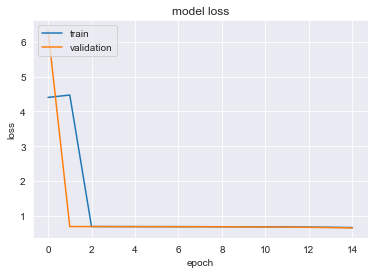

In [10]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


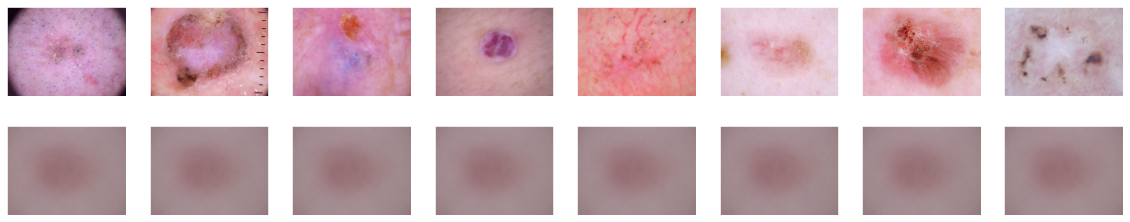

In [11]:
decoded_imgs = sparse_l1_ae.predict(over_xTest[1:50,:,:,:])
n = 8
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(over_xTest[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

/Users/nidhisoley/opt/anaconda3/envs/tensorenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/Users/nidhisoley/opt/anaconda3/envs/tensorenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


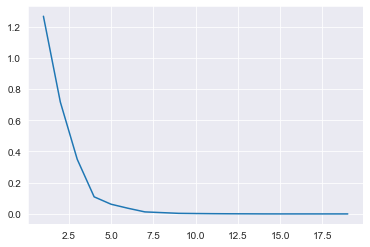

In [12]:
codings2=sparse_l1_encoder.predict(over_xTrain)
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(codings2)
    score_2.append(kmeans.inertia_)
plt.plot(range_values,score_2)   

In [13]:
kmeans = KMeans(7)
label=kmeans.fit_predict(codings2)

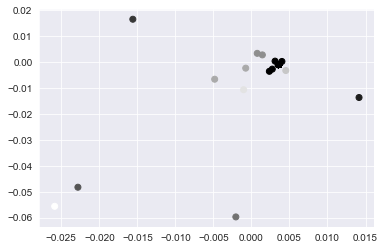

In [14]:
plt.scatter(codings2[:,0],codings2[:,1],c=kmeans.labels_)

In [38]:
kmeans=KMeans(n_clusters=7)
kmeans.fit_predict(over_xTrain.reshape(len(over_xTrain),-1))


array([2, 3, 3, 2, 3, 2, 2, 5, 0, 1, 4, 3, 6, 6, 5, 2, 1, 3, 6, 5, 0, 1,
       5, 1, 1, 2, 1, 4, 1, 2, 2, 5, 4, 4, 6, 1, 3, 1, 3, 5, 1, 1, 4, 2,
       1, 0, 4, 0, 3, 4, 3, 4, 1, 5, 4, 4, 3, 0, 1, 0, 2, 3, 1, 0, 6, 1,
       4, 4, 0, 3, 4, 0, 3, 6, 5, 3, 5, 1, 2, 1, 4, 2, 1, 3, 2, 4, 1, 0,
       4, 2, 6, 1, 0, 3, 2, 5, 2, 4, 2, 1, 2, 0, 1, 3, 3, 3, 1, 4, 4, 1,
       4, 4, 2, 3, 4, 1, 5, 6, 1, 4, 3, 1, 3, 3, 1, 4, 4, 1, 2, 5, 3, 1,
       2, 3, 4, 2, 0, 0, 1, 2, 3, 1, 3, 3, 0, 1, 1, 1, 5, 3, 2, 2, 3, 6,
       5, 3, 3, 3, 2, 0, 2, 2, 3, 3, 2, 6, 3, 4, 4, 0, 0, 3, 2, 1, 4, 6,
       4, 2, 1, 3, 3, 3, 4, 4, 1, 0, 4, 0, 4, 4, 3, 1, 6, 2, 3, 4, 3, 4,
       1, 4, 2, 4, 0, 3, 6, 1, 0, 5, 5, 2, 3, 3, 3, 2, 3, 4, 2, 6, 4, 2,
       3, 0, 3, 1, 2, 4, 6, 1, 5, 1, 4, 2, 3, 6, 0, 1, 2, 6, 1, 4, 1, 6,
       5, 0, 3, 1, 3, 2, 2, 1, 1, 5, 1, 2, 0, 1, 1, 1, 1, 3, 1, 0, 2, 0,
       3, 6, 2, 1, 5, 2, 4, 2, 0, 5, 3, 2, 6, 3, 6, 0, 1, 0, 2, 4, 3, 3,
       0, 5, 2, 3, 4, 1, 2, 2, 5, 3, 5, 4, 4, 2, 2,

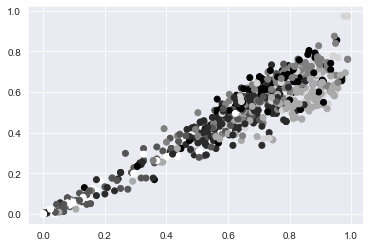

In [39]:
plt.scatter(over_xTrain.reshape(len(over_xTrain),-1)[:,0],over_xTrain.reshape(len(over_xTrain),-1)[:,1],c=kmeans.labels_)


### Observation.
The accuracy of the Sparsed Autoencoder on the validation set for Oversampled multi-class is 0.95, and the learning curve (loss curve)also shows that the loss is decreasing with each epoch. The loss for both validation and train converge at later epochs. Hence we think that the sparsed autoencoder is a good model for multi class data, however, since our data set is too big we were not able to run the model on entire dataset. This probably leads to classifying everything to just one class. Moreover the images in the dataset are very close to each other and hence all the reconstructed images look similar. The cluster Kmeans analysis shows that the encoded model predicts all the class spreaded.

### Undersample multi class classifcation

In [3]:
multi_underTrainData=pd.read_csv('multi_under_TrainData.csv')
multi_underTestData=pd.read_csv('multi_under_TestData.csv')
multi_underValData=pd.read_csv('multi_under_ValData.csv')

In [4]:
#PROCESS over IMAGES TRAIN
under_images_train = []

for i in multi_underTrainData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    under_images_train.append(input_arr)

In [5]:
#PROCESS over IMAGES test
under_images_test = []

for i in multi_underTestData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    under_images_test.append(input_arr)

In [6]:
#PROCESS TRIPLE IMAGES TRAIN
under_images_val = []

for i in multi_underValData.iloc[:,0]: 
    path="../archive/images/" + i + ".jpg"
    image=tf.keras.preprocessing.image.load_img(
        path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    under_images_val.append(input_arr)

In [8]:
#FINAL BINARY PROCESSING

#Train
under_yTrain = np.asarray(multi_underTrainData.loc[:, multi_underTrainData.columns != 'image'])
print(under_yTrain.shape)

#Test
under_yTest = np.asarray(multi_underTestData.loc[:, multi_underTestData.columns != 'image'])
print(under_yTest.shape)

#Val
under_yVal = np.asarray(multi_underValData.loc[:, multi_underValData.columns != 'image'])
print(under_yVal.shape)

#Train
under_xTrain = np.asarray(under_images_train).astype('float32') / 255.
print(under_xTrain.shape)

#Test
under_xTest = np.asarray(under_images_test).astype('float32') / 255.
print(under_xTest.shape)

#Val
under_xVal = np.asarray(under_images_val).astype('float32') / 255.
print(under_xVal.shape) 

(563, 7)
(121, 7)
(121, 7)
(563, 450, 600, 3)
(121, 450, 600, 3)
(121, 450, 600, 3)


In [12]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[450, 600, 3]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    
    keras.layers.ActivityRegularization(l1=1e-5)  
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[300]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(450*600*3, activation="sigmoid"),
    keras.layers.Reshape([450, 600, 3])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer="adam",
                     metrics=['accuracy'])
history4 = sparse_l1_ae.fit(under_xTrain[1:50,:,:,:], under_xTrain[1:50,:,:,:], epochs=15,verbose=True, validation_data=(under_xTest[1:50,:,:,:], under_xTest[1:50,:,:,:]))


Epoch 1/15
2/2 [==============================] - 24s 13s/step - loss: 0.7044 - accuracy: 0.3334 - val_loss: 0.7057 - val_accuracy: 0.5787
Epoch 2/15
2/2 [==============================] - 21s 11s/step - loss: 0.6974 - accuracy: 0.6393 - val_loss: 0.6586 - val_accuracy: 0.9265
Epoch 3/15
2/2 [==============================] - 19s 11s/step - loss: 0.6551 - accuracy: 0.9028 - val_loss: 0.6496 - val_accuracy: 0.9524
Epoch 4/15
2/2 [==============================] - 14s 8s/step - loss: 0.6454 - accuracy: 0.9190 - val_loss: 0.6481 - val_accuracy: 0.9524
Epoch 5/15
2/2 [==============================] - 18s 12s/step - loss: 0.6433 - accuracy: 0.9190 - val_loss: 0.6422 - val_accuracy: 0.9524
Epoch 6/15
2/2 [==============================] - 19s 10s/step - loss: 0.6375 - accuracy: 0.9190 - val_loss: 0.6391 - val_accuracy: 0.9524
Epoch 7/15
2/2 [==============================] - 21s 10s/step - loss: 0.6338 - accuracy: 0.9190 - val_loss: 0.6365 - val_accuracy: 0.9524
Epoch 8/15
2/2 [============

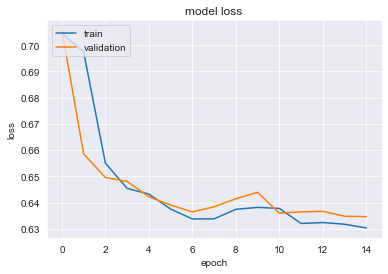

In [13]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


The validation loss is more than the training loss after 5th epoch this indicates that the model might be underfitting.

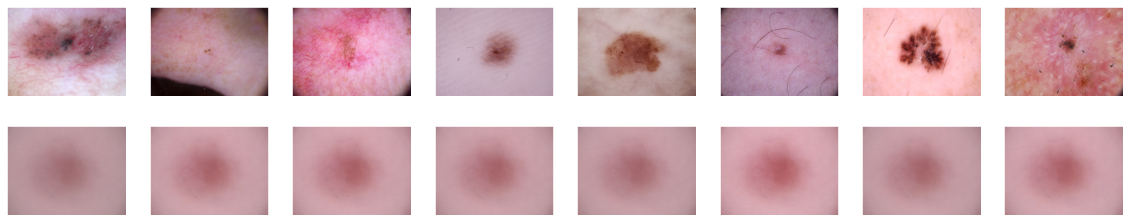

In [14]:
decoded_imgs = sparse_l1_ae.predict(under_xTest[1:50,:,:,:])
n = 8
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(under_xTest[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

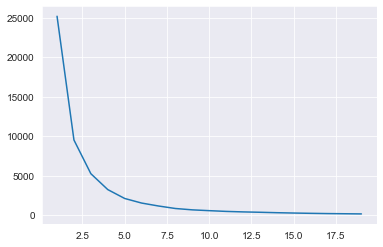

In [23]:
codings3=sparse_l1_encoder.predict(under_xTrain)
score_3 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(codings3)
    score_3.append(kmeans.inertia_)
plt.plot(range_values,score_3)   

In [31]:
kmeans = KMeans(7)
label=kmeans.fit_predict(codings3)

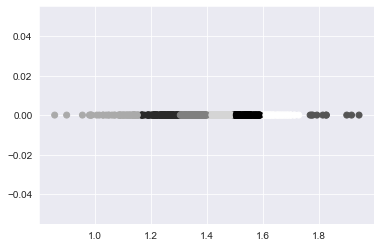

In [32]:
plt.scatter(codings3[:,0],codings3[:,1],c=kmeans.labels_)

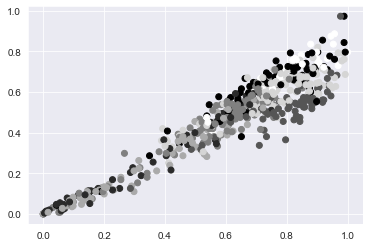

In [26]:
kmeans=KMeans(n_clusters=7)
kmeans.fit_predict(under_xTrain.reshape(len(under_xTrain),-1))
plt.scatter(under_xTrain.reshape(len(under_xTrain),-1)[:,0],under_xTrain.reshape(len(under_xTrain),-1)[:,1],c=kmeans.labels_)


### Observation.
The accuracy of the Sparsed Autoencoder on the validation set for undersampled multi-class is about 0.95, and the learning curve (loss curve)also shows that the loss is decreasing with each epoch. The validation loss becomes higher at 5th epoch which may indicate that the model is underfitting. Since our data set is too big we were not able to run the model on entire dataset. This probably leads to classifying everything to just one class. Moreover the images in the dataset are very close to each other and hence all the reconstructed images look similar. The cluster Kmeans analysis shows that the encoded model predicts all the class spreaded along a line.

#### From all the data set that wet worked with, we think three class classification and oversample class classification give good results. Hence, we try to run the code for entire dataset for the three class classification

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[450, 600, 3]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="selu"),
    
    keras.layers.ActivityRegularization(l1=1e-3)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(300, activation="selu"),
    keras.layers.Dense(450*600*3, activation="sigmoid"),
    keras.layers.Reshape([450, 600, 3])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer="adam",
                     metrics=['accuracy'])
history2 = sparse_l1_ae.fit(triple_xTrain, triple_xTrain, epochs=10,verbose=True,validation_data=(triple_xTest,triple_xTest))


Epoch 1/10
22/22 [==============================] - 606s 28s/step - loss: 5.6700 - accuracy: 0.6990 - val_loss: 0.7621 - val_accuracy: 0.9089
Epoch 2/10
22/22 [==============================] - 493s 23s/step - loss: 0.7047 - accuracy: 0.9218 - val_loss: 0.6654 - val_accuracy: 0.9173
Epoch 3/10
22/22 [==============================] - 567s 26s/step - loss: 0.6564 - accuracy: 0.9227 - val_loss: 0.6482 - val_accuracy: 0.9173
Epoch 4/10
22/22 [==============================] - 507s 23s/step - loss: 0.6495 - accuracy: 0.9227 - val_loss: 0.6444 - val_accuracy: 0.9173
Epoch 5/10
22/22 [==============================] - 510s 23s/step - loss: 0.6461 - accuracy: 0.9227 - val_loss: 0.6455 - val_accuracy: 0.9173
Epoch 6/10
22/22 [==============================] - 841s 39s/step - loss: 0.6449 - accuracy: 0.9227 - val_loss: 0.6415 - val_accuracy: 0.9173
Epoch 7/10
22/22 [==============================] - 439s 20s/step - loss: 0.6410 - accuracy: 0.9227 - val_loss: 0.6379 - val_accuracy: 0.9173
Epoch 

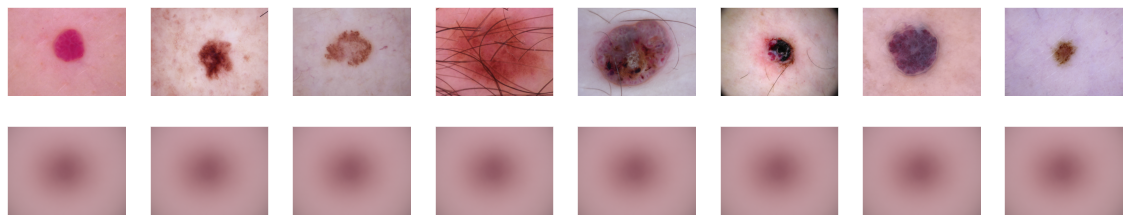

In [11]:
decoded_imgs = sparse_l1_ae.predict(triple_xTest[1:50,:,:,:])
n = 8
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(triple_xTest[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(450, 600, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

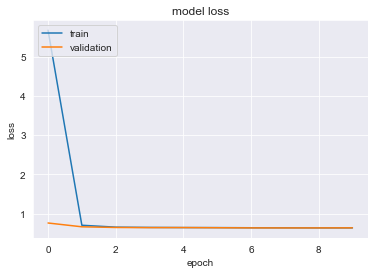

In [12]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#### Observations
The output images still remain the same. I think it could be because of:
1. Our model is simple for this huge data set and hence its not learning much.
2. The images are very similar to each other hence the autoencoder is not able to give us distinct ouputs even for 1000 images. Probably we need some segmentation or computer vision techniques to process the dataset and then use the autoencoder for classification.
